<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 9</h2>
<h3 align='center'>April 13, 2018</h3>
<h3 align='center'>M V A Suhas Kuamr EE17B109</h3>

# Introduction
In this assignment, we continue our analysis of signals using Fourier Transforms. This time, we focus on finding transforms of functions which are discontinuous when periodically extended. An example of this is $\sin(\sqrt{2} t)$. The discontiuity causes fourier components in frequencies other than the sinusoids frequency which decay as $\frac{1}{\omega}$, due to Gibbs phenomenon. We resolve this problem using the process of windowing. In this assignment, we focus on one particular type of window - the Hamming window. We use this windowed transform to analyse signals known to contain a sinusoid of unknown frequencies and extract its phase and frequency. We then perform a sliding DFT on a chirped signal and plot a spectrogram or a time-frequency plot.

# Spectrum of $\sin(\sqrt(2)t)$

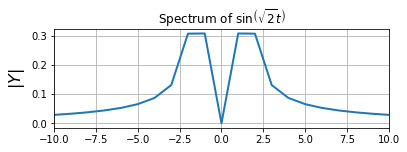

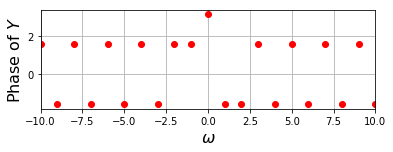

In [179]:
from pylab import *
import matplotlib.pyplot as plt
t = np.linspace(-pi,pi,65)[:-1]
dt = t[1]-t[0]
fmax = 1/dt
y = sin(sqrt(2)*t)
y[0] = 0
y = fftshift(y)
Y=fftshift(fft(y))/64.0
w = np.linspace(-pi*fmax,pi*fmax,65)[:-1]
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-10,10])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)$")
grid(True)
show()
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

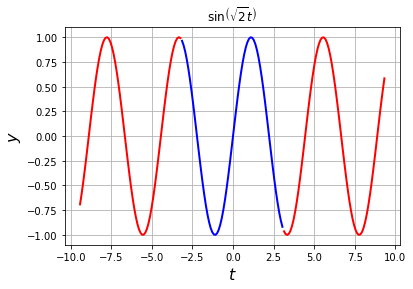

In [180]:
from pylab import *
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
# y=sin(sqrt(2)*t)
figure(2)
plot(t1,sin(sqrt(2)*t1),"b",lw=2)
plot(t2,sin(sqrt(2)*t2),"r",lw=2)
plot(t3,sin(sqrt(2)*t3),"r",lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$")
grid(True)
show()

However, when we calculate the DFT by sampling over a finite time window, we end up calculating the DFT of the following periodic signal:

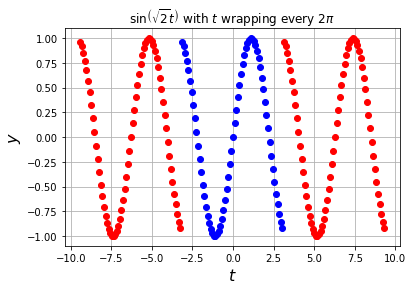

In [181]:
from pylab import *
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
y=sin(sqrt(2)*t1)
figure(3)
plot(t1,y,"bo",lw=2)
plot(t2,y,"ro",lw=2)
plot(t3,y,"ro",lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

This results in discontinuites in the signal. These discontinuities lead to spectral components which decay as  $1/\omega$. To confirm this, we plot the spectrum of the periodic ramp below:

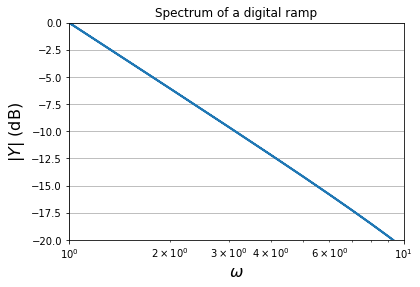

In [208]:
from pylab import *
t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=t
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
semilogx(abs(w),20*log10(abs(Y)),lw=2)
xlim([1,10])
ylim([-20,0])
#xticks([1,2,5,10],["1","2","5","10"],size=16)
ylabel(r"$|Y|$ (dB)",size=16)
title(r"Spectrum of a digital ramp")
xlabel(r"$\omega$",size=16)
grid(True)
show()

# Hamming Window

We resolve the problem of discontinuities by attenuating the signal near the endpoints of our time window, to reduce the discontinuities caused by periodically extending the signal. This is done by multiplying by a so called windowing function. In this assignment we use the Hamming window of size  NN :

$x[n]\ =\ 0.54 + 0.46\cos(2π\frac{n}{N−1})$


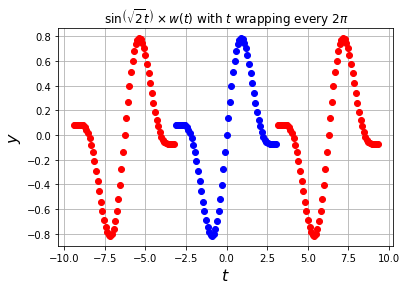

In [209]:
from pylab import *
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
n=arange(64)
wnd=fftshift(0.54+0.46*cos(2*pi*n/63))
y=sin(sqrt(2)*t1)*wnd
figure(3)
plot(t1,y,"bo",lw=2)
plot(t2,y,"ro",lw=2)
plot(t3,y,"ro",lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

The spectrum is found below using a window size of $2 \pi$:

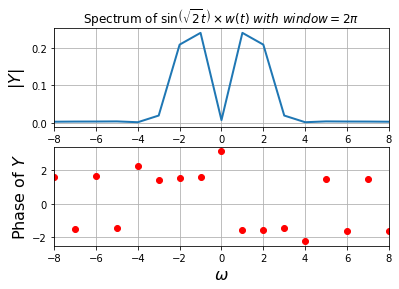

In [186]:
from pylab import *
t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(64)
wnd=fftshift(0.54+0.46*cos(2*pi*n/63))
y=sin(sqrt(2)*t)*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-8,8])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)\ with\ window = 2\pi$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
xlim([-8,8])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

The spectrum is found below using a window size of $8 \pi$:

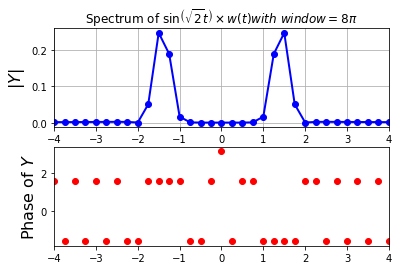

In [194]:
from pylab import *
t=linspace(-4*pi,4*pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(256)
wnd=fftshift(0.54+0.46*cos(2*pi*n/256))
y=sin(sqrt(2)*t)
# y=sin(1.25*t)
y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),"b",w,abs(Y),"bo",lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t) with\ window = 8\pi$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
show()

# FFT of $\cos^3(0.86t)$

We first find the FFT without the Hamming window:

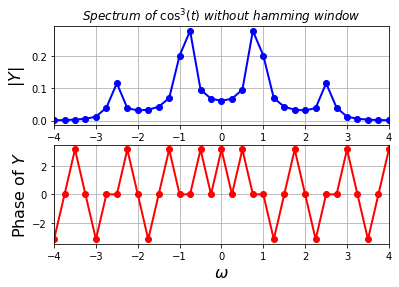

In [210]:
from pylab import *
t=linspace(-4*pi,4*pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=(cos(0.86*t))**3
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),"b",w,abs(Y),"bo",lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"$Spectrum\ of\ \cos^{3}(t)\ without\ hamming\ window $")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"r",w,angle(Y),"ro",lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

We first find the FFT with the Hamming window:

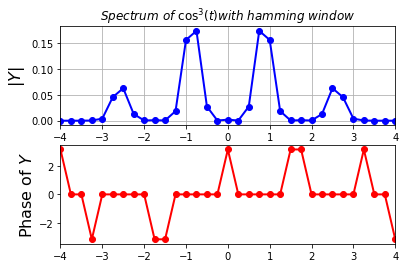

In [192]:
from pylab import *
t=linspace(-4*pi,4*pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(256)
wnd=fftshift(0.54+0.46*cos(2*pi*n/256))
y=(cos(0.86*t))**3
# y=sin(1.25*t)
y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),"b",w,abs(Y),"bo",lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"$Spectrum\ of\ \cos^{3}(t)\ with\ hamming\ window $")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"r",w,angle(Y),"ro",lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
show()

# Estimating $\omega$ and $\delta$

We  find a weighted average of frequencies weighted by the magnitude of the DFT to obtain the peak frequency  $\omega$ . To find  $\delta$ , phase values around the peak frequency are averaged.

In [211]:
tmax=pi
tmin=-pi
t1 = np.linspace(4*tmin,4*tmax,513)[:-1]
y = cos(0.8*t1+(pi/2))
def w_dho(y):
    t = np.linspace(-4*pi,4*pi,513)[:-1]
    dt=t[1]-t[0];fmax=1/dt
    y[0]=0 # the sample corresponding to -tmax should be set zeroo
    y=fftshift(y) # make y start with y(t=0)
    Y=fftshift(fft(y))/512.0
    w=linspace(-pi*fmax,pi*fmax,513);w=w[:-1]
    jj = np.where(abs(Y)>0.035)
    pro = sum(abs((abs(Y[jj]))*(w[jj])))
    den = sum(abs(Y[jj]))
    omega = pro/den
    ind = np.argmax(abs(Y))
    delta = abs(angle(Y[ind]))
    return omega,delta
    

    

In [212]:
omega_no_noise,delta_no_noise = w_dho(y)
print("omega & delta without noise"+"  "+str(omega_no_noise)+"  "+"&"+" "+str(delta_no_noise))

omega & delta without noise  0.8592006299926344  & 1.5707963267948966


In [213]:
tmax=pi
tmin=-pi
t1 = np.linspace(4*tmin,4*tmax,513)[:-1]
y = cos(0.8*t1+(pi/2))
y_noise = y + 0.1*randn(512)
omega_noise,delta_noise = w_dho(y_noise)
print("omega & delta with noise"+"  "+str(omega_noise)+"  "+"&"+" "+str(delta_noise))



omega & delta with noise  0.8571894570710277  & 1.5582676098424377


# Spectrum of chirp Signal!

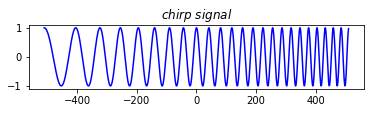

<Figure size 432x288 with 0 Axes>

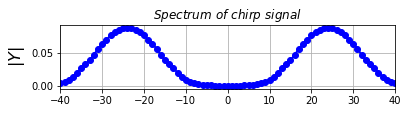

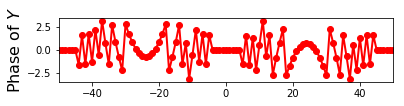

In [216]:
t = np.linspace(-pi,pi,1025)[:-1]
from pylab import *
dt=t[1]-t[0];fmax=1/dt
n=arange(1024)
wnd=fftshift(0.54+0.46*cos(2*pi*n/1024))
y=cos(16*(1.5 + (t/(2*pi)))*t)
# y=sin(1.25*t)
w=linspace(-pi*fmax,pi*fmax,1025);w=w[:-1]
subplot(3,1,3)
plot(w,y,"b")
title(r"$chirp\ signal $")

y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/1024.0
figure()
show()
subplot(3,1,2)
plot(w,abs(Y),"bo",w,abs(Y),"b",lw=2)
xlim([-40,40])
ylabel(r"$|Y|$",size=16)
title(r"$Spectrum\ of\ chirp\ signal$")
grid(True)
show()
subplot(3,1,3)
phi = angle(Y)
ii = np.where(abs(Y)<10**-3)
phi[ii]=0
plot(w,phi,"ro",w,phi,"r",lw=2)
xlim([-50,50])
ylabel(r"Phase of $Y$",size=16)
show()

We now observe that the frequencies are more confined to the range between 16 and 32, as expected. The extra components due to the discontinuity have been suppressed due to hamming window

# Spectrum vs Time n frequency

To obtain a better picture of what is going in the chirp signal, we take the DFT of a small window of samples around each time instant, and plot a 2D surface of the resulting spectra vs time. 

In [217]:
batches = (1024//64)
Y_batches=[]
n=arange(64)
wnd=fftshift(0.54+0.46*cos(2*pi*n/64))
y=cos(16*(1.5 + (t/(2*pi)))*t)
# y=sin(1.25*t)
t = np.linspace(-pi,pi,1025)[:-1]
dt = t[1]-t[0]
fmax = 1/dt
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
for k in range(1024-64):
    y_batch = y[k:k+64]*fftshift(wnd)
    Y_mini=fftshift(fft(y_batch))/1024.0
    Y_batches.append(Y_mini)
Y_batches = array(Y_batches)
t_test = t[:-64]
xv, yv = np.meshgrid(t_test, w, sparse=False, indexing='ij')


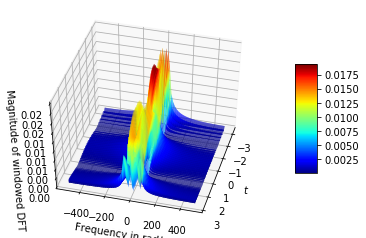

In [218]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xv, yv, abs(Y_batches), rstride=1, cstride=1, cmap=cm.jet, linewidth=1, antialiased=True) 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel("$t$")
ax.set_ylabel("Frequency in rad/s")
ax.set_zlabel("Magnitude of windowed DFT")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 15)
show()

# Conclusions
* From the above examples, it is clear that using a Hamming window before taking a DFT helps in reducing the effect of Gibbs phenomenon arising due to discontinuities in periodic extensions.
* However, this comes at the cost of spectral leakage. This is basically the blurring of the sharp peaks in the DFT. It occurs because of convolution with the spectrum of the windowing function. Deltas in the original spectrum are smoothed out and replaced by the spectrum of the windowing function.
* We used this windowed DFT to estimate the frequency and phase of an unknown sinusoid from its samples.
* By performing localized DFTs at different time isntants, we obtained a time-frequency plot which allowed us to better analyse signals with varying frequencies in time.